<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [2]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


c:\Users\slpri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


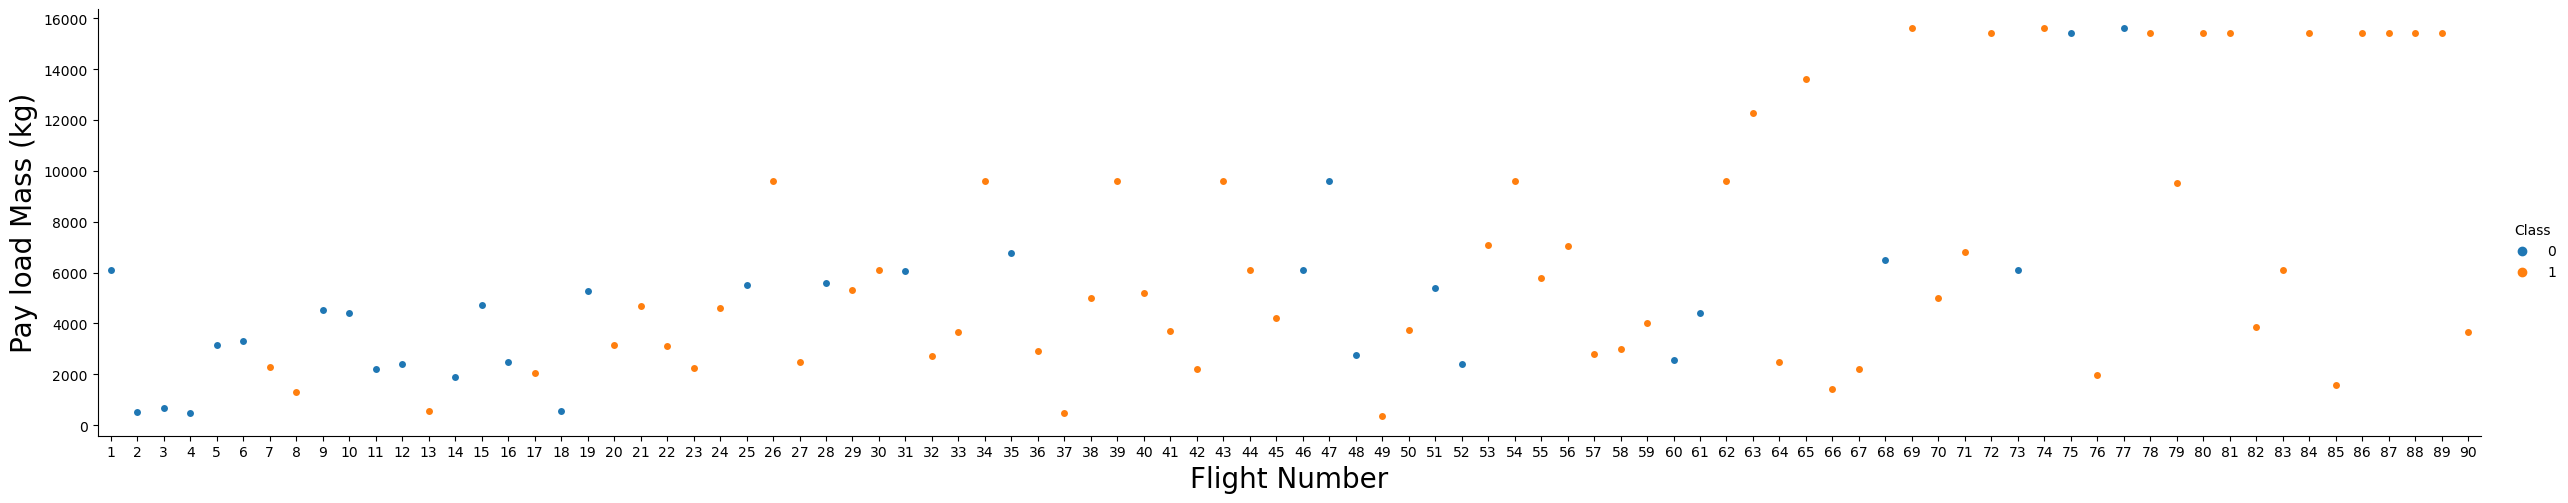

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


c:\Users\slpri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


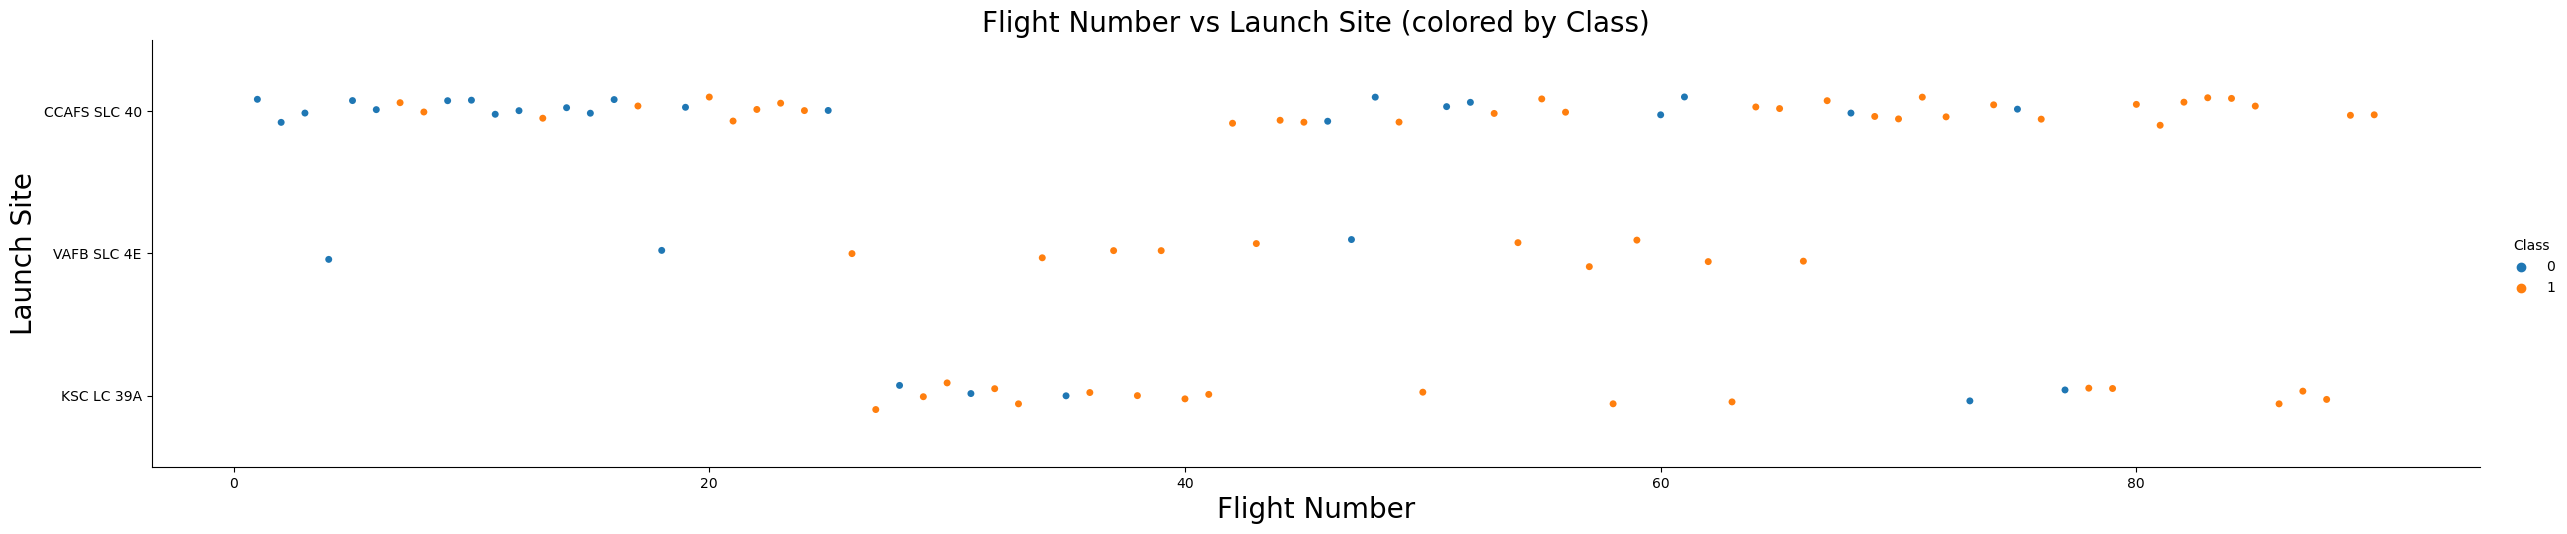

In [5]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the dataset is already loaded into df
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Flight Number vs Launch Site (colored by Class)", fontsize=20)
plt.show()


Patterns in the Flight Number vs. Launch Site Scatter Plot:
- Multiple Launches from the Same Site: You might see clusters of data points corresponding to specific launch sites. These clusters would show how many flights have been made from a particular site and their outcomes.

- Launch Outcome by Site: The Class hue will indicate whether the launch was successful (Class == 1) or failed (Class == 0). This can help show if some sites have a higher success rate.

- Trend Over Time (via Flight Number): If there are certain patterns as the Flight Number increases, like increased successful landings (for instance, the more flight attempts, the higher the success rate), this might indicate improvements in the system or technology.

- Launch Site Performance: The specific launch site could show differences in success and failure rates, potentially influenced by factors like location, infrastructure, and payload size.

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


c:\Users\slpri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


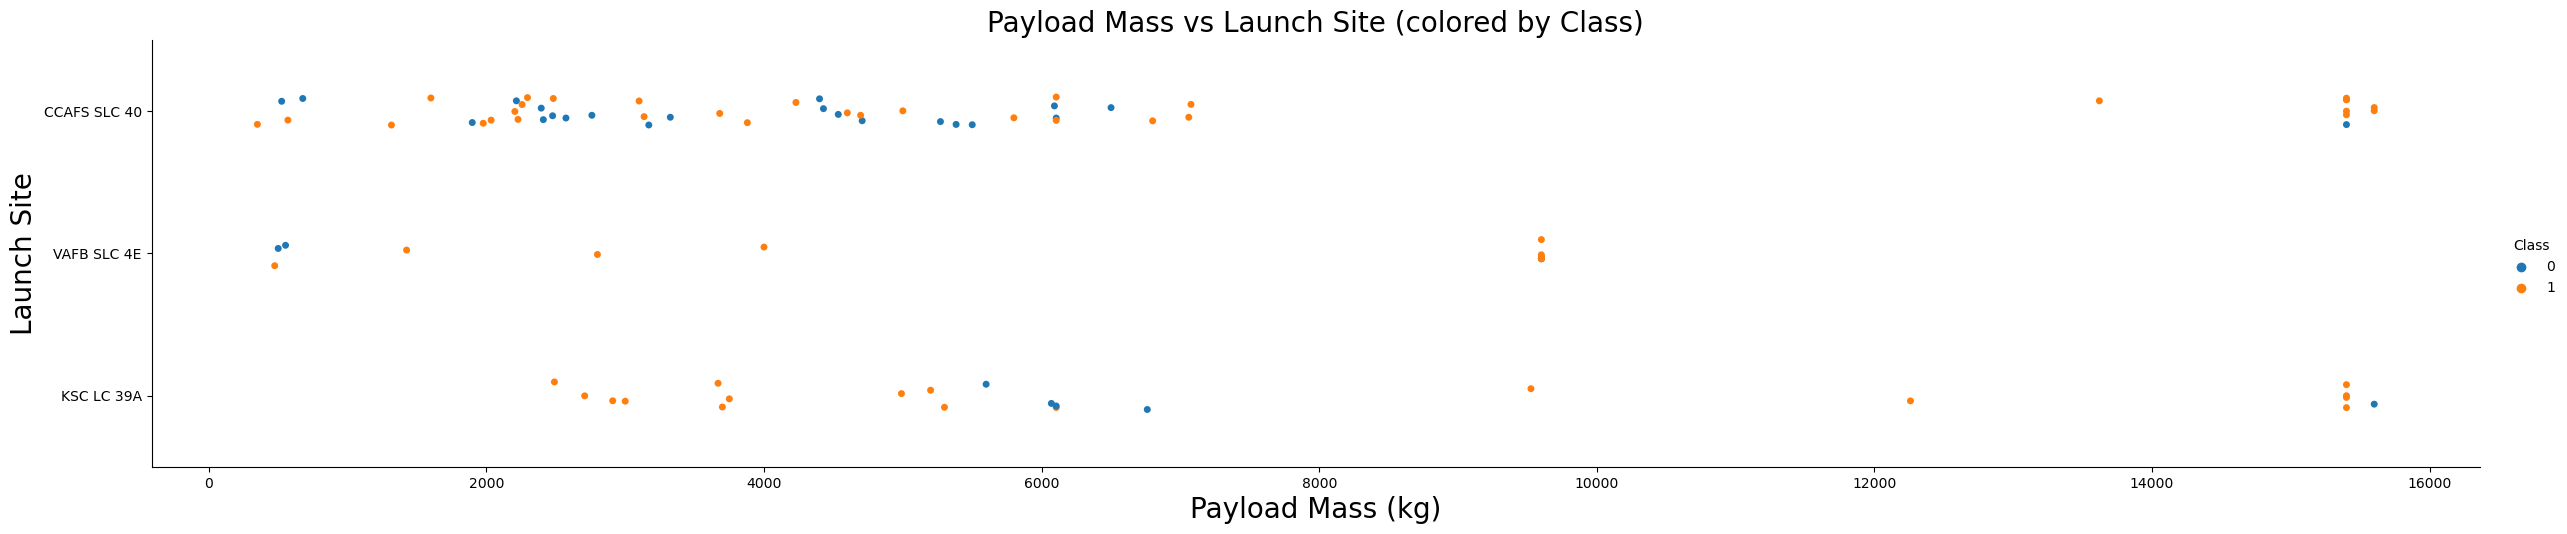

In [6]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the dataset is already loaded into df
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Payload Mass vs Launch Site (colored by Class)", fontsize=20)
plt.show()


Patterns:
- Payload Mass for Each Launch Site: You may notice that different sites handle different ranges of payload masses. Some launch sites may focus on handling only light payloads, while others are equipped for heavy payloads.

- Heavier Payloads at Certain Sites: If there are very few or no launches with payload masses greater than 10,000 kg from certain sites like VAFB-SLC, it could indicate that the site's infrastructure or capacity doesn't support launching heavy payloads. This would explain why heavier payloads are not being launched from there.

- Launch Outcome: The Class hue (success/failure) will help identify if the weight of the payload has any relationship with the launch outcome. For example, if we see many failures associated with heavier payloads from certain launch sites, this might suggest that heavy payloads could be a factor in launch challenges for specific sites.

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


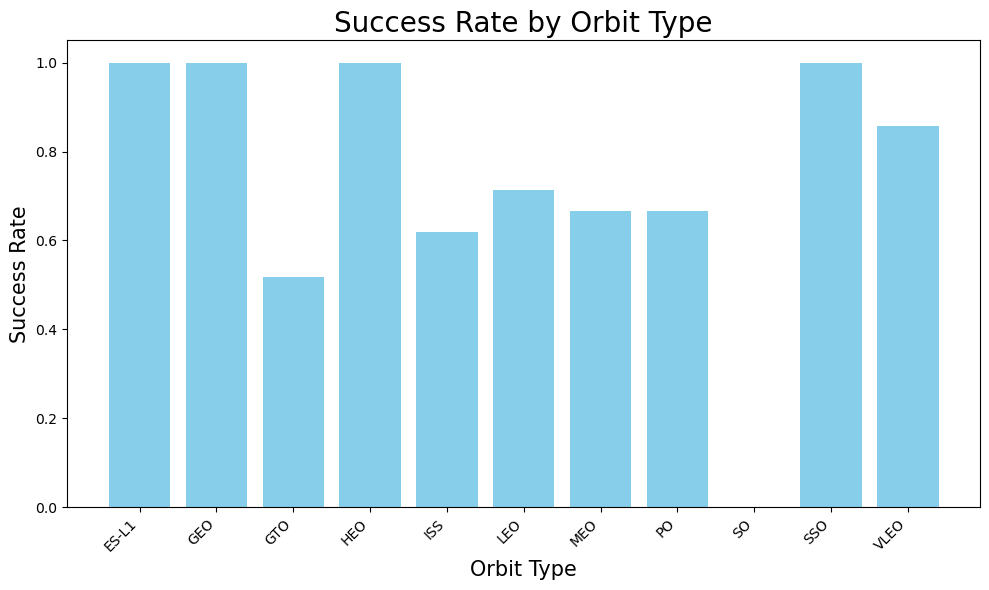

In [7]:
# HINT use groupby method on Orbit column and get the mean of Class column
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'Orbit' and calculate the mean of 'Class' (which represents success rate)
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(orbit_success_rate['Orbit'], orbit_success_rate['Class'], color='skyblue')
plt.xlabel('Orbit Type', fontsize=15)
plt.ylabel('Success Rate', fontsize=15)
plt.title('Success Rate by Orbit Type', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Success Rate by Orbit: Each bar represents the mean Class value for each orbit type, which indicates the success rate for launches in that orbit. The higher the bar, the higher the success rate for that specific orbit type.

- Identify High Success Rates: Orbits with higher bars indicate that the launches associated with those orbit types generally had a higher success rate. Look for orbit types that consistently show near a 1.0 (indicating high success).

- Lower Success Rates: If some orbits have lower bars (closer to 0), it suggests that the launches within these orbits have a lower success rate, possibly due to challenges related to the payload or conditions for that specific orbit.

- Interesting Insights: Some specific orbit types might have a history of more successful launches compared to others, which could imply a particular orbit's favorable conditions for launches.

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


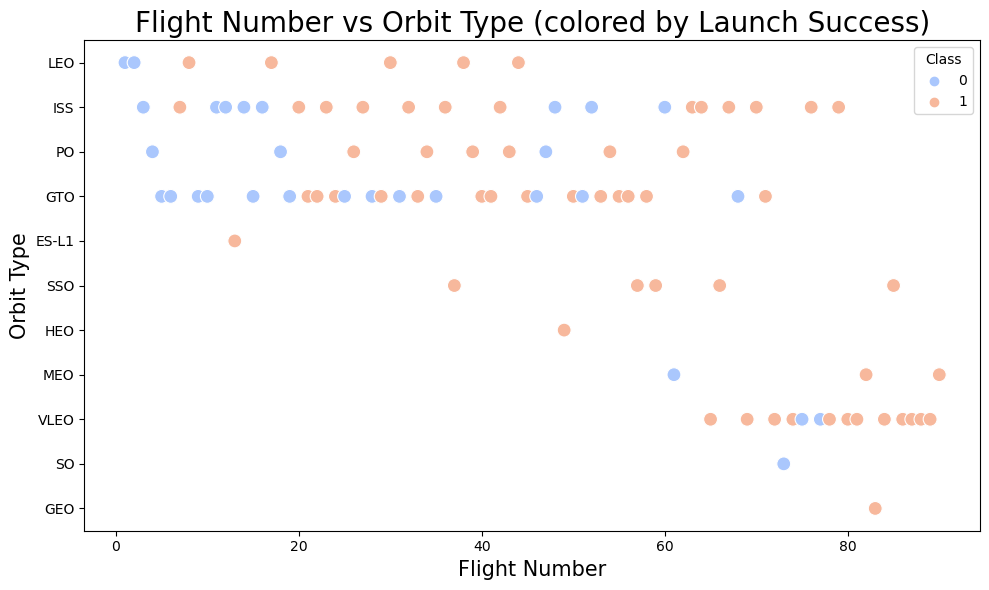

In [8]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the scatter chart with FlightNumber on the x-axis, Orbit on the y-axis, and Class as the hue
plt.figure(figsize=(10,6))
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df, palette="coolwarm", s=100)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Flight Number vs Orbit Type (colored by Launch Success)", fontsize=20)
plt.legend(title="Class", loc="upper right")
plt.tight_layout()
plt.show()

- LEO (Low Earth Orbit) Relationship: In LEO orbit, you might notice a trend where success seems to improve with increasing FlightNumber. This suggests that over time, as SpaceX gains more experience and improves its technology, the success rate of LEO missions may increase, making LEO launches more reliable as the number of flights grows.

- GTO (Geostationary Transfer Orbit) Behavior: For the GTO orbit, you may see no significant pattern between FlightNumber and success. The plot could show scattered results with no clear trend indicating that, for GTO missions, success does not necessarily depend on the number of flights. The GTO orbit might be more challenging, with various payload or mission-related complexities impacting the outcomes.

- Scatter Point Distribution: If you observe concentrated areas where most points are located (whether successful or failed), it suggests that a particular region in FlightNumber is common across launches for those orbits. This can highlight typical stages in mission progress where SpaceX has more experience, and it may affect the success or failure rates for different orbit types.

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


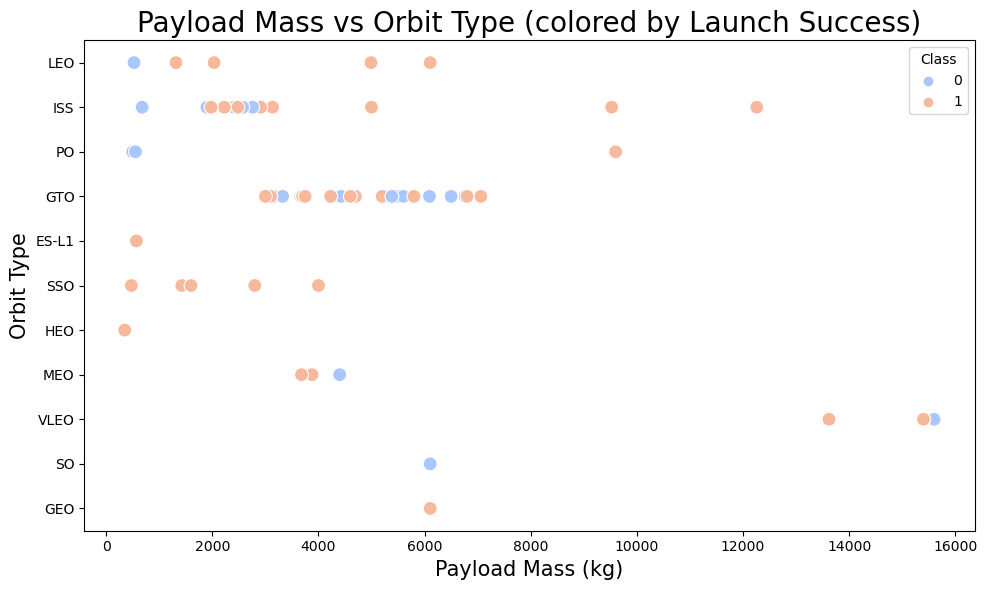

In [9]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the scatter chart with Payload Mass on the x-axis, Orbit on the y-axis, and Class as the hue
plt.figure(figsize=(10,6))
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df, palette="coolwarm", s=100)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Payload Mass vs Orbit Type (colored by Launch Success)", fontsize=20)
plt.legend(title="Class", loc="upper right")
plt.tight_layout()
plt.show()

- Heavy Payloads in Certain Orbits: You might see that for heavier payloads (larger values on the PayloadMass axis), certain orbit types like Polar, LEO, and ISS tend to have a higher proportion of successful launches (shown by Class == 1). This could indicate that these orbits are more suitable for heavy payloads, and the landing process for these orbits is more successful when carrying heavier loads.

- Difficulty with GTO Orbit: For the GTO (Geostationary Transfer Orbit), there might be a scattering of both successful and unsuccessful landings across varying Payload Mass values. The Class values could be mixed in a way that makes it difficult to distinguish between the outcomes, possibly due to the complexities associated with the GTO orbit, which may involve more challenging landing conditions or specific mission constraints.

- Distribution Patterns: By examining the spread of the data points, you will see whether there is a certain point at which the PayloadMass becomes more likely to succeed or fail for each Orbit. Heavy payloads in the GTO might be more scattered, while orbits like Polar or LEO could show a more uniform pattern of success as the payload weight increases.

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [10]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

   Year     Class
0  2010  0.000000
1  2012  0.000000
2  2013  0.000000
3  2014  0.333333
4  2015  0.333333
5  2016  0.625000
6  2017  0.833333
7  2018  0.611111
8  2019  0.900000
9  2020  0.842105


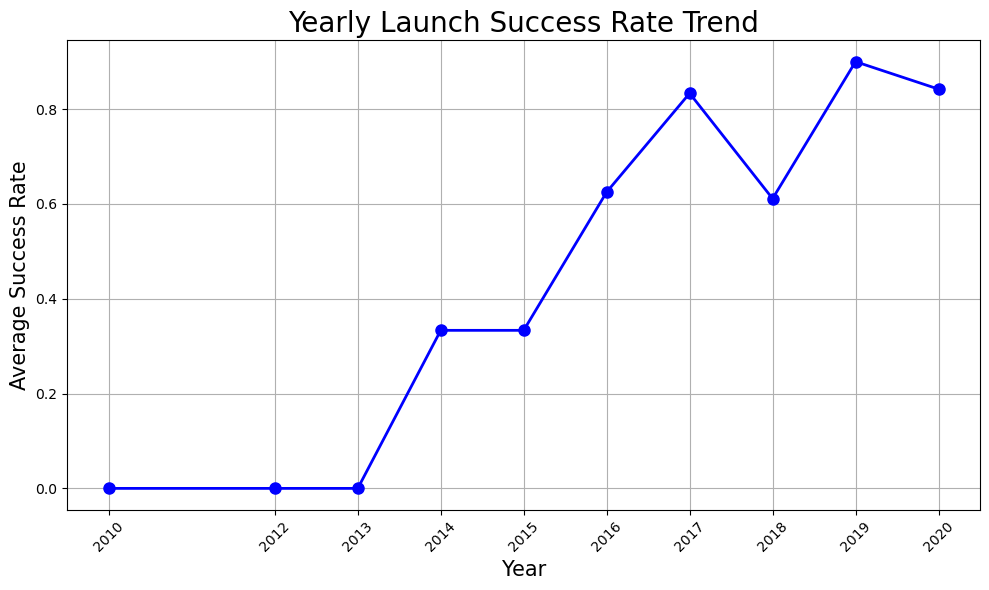

In [13]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# Function to Extract Year from the Date column
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Apply the function to extract the year and create a new column
year_list = Extract_year()
df['Year'] = year_list

# Convert the 'Year' column to an integer type (in case it's not)
df['Year'] = df['Year'].astype(int)

df.head()

# Group by Year and calculate the mean of 'Class' for average success rate per year
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Print the success rate by year to inspect
print(yearly_success_rate)

import matplotlib.pyplot as plt

# Plotting the line chart for yearly success trend
plt.figure(figsize=(10,6))
plt.plot(yearly_success_rate['Year'], yearly_success_rate['Class'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Success Rate', fontsize=15)
plt.title('Yearly Launch Success Rate Trend', fontsize=20)
plt.xticks(yearly_success_rate['Year'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [15]:
# HINT: Use get_dummies() function on the categorical columns
# Select the relevant columns
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Apply One-Hot Encoding using get_dummies() on categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=True)

# Display the first few rows of the result dataframe
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [16]:
# HINT: use astype function
# Cast the entire dataframe to float64
features_one_hot = features_one_hot.astype('float64')

# Display the result to check the data types
print(features_one_hot.dtypes)


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 76, dtype: object


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
